In [6]:
import os
import requests
import json
import sys
import ollama
documents_folder = 'OUT'
document_files = [f for f in os.listdir(documents_folder) if os.path.isfile(os.path.join(documents_folder, f))]


In [7]:
for document in document_files:
    document_path = os.path.join(documents_folder, document)
    with open(document_path,'r') as temp:
        text=temp.read()
    print(document,text)
    break

COSCO.txt --- 1 ---
     6343267510
PILLLIPAEDAOJAPILLLIP OCKKKCOAKJDMKAOCKKKCO MEMHLAKABEBHJFGFOCFJG LKCCCKLAEDEICFLHOMKEP PAOOOAPAKPMHJJCAEAKNL IIIIIIIAIIIIAAIIIAIAI
  Booking Acknowledgement
DATE: 27 Sep 2022 16:21
  FROM:
CONTACT NUMBER:
BOOKING REMARK
DATE BOOKED: BOOKING NUMBER: BOOKING STATUS: BOOKING OFFICE:
PARTIES INFORMATION
BOOKING PARTY: FORWARDER: SHIPPER:
COSCO SHIPPING Lines (North America) Inc. Los Angeles
EMAIL ADDRESS:
https://coscoshippingla.freshdesk.com
    26 Aug 2022 6343267510 Confirmed LAX
Binex Line Corporation
Binex Line Corporation
 RATE AGREEMENT REFERENCE:
LAN22039 - (SERVICE CONTRACT)
  ROUTE INFORMATION
 TOTAL BOOKING CONTAINER QTY SIZE/TYPE:
6 X 40' Hi-Cube Refrigerated Container
 PLACE OF RECEIPT: Long Beach,Los Angeles, California, United States
 PORT OF LOADING: Long Beach / Long Beach Container Terminal , LLC ETA: 10 Oct 2022
 INTENDED VESSEL/VOYAGE: COSCO ENGLAND 054W ETD: 15 Oct 2022
 SERVICE CODE: SEA VESSEL FLAG: Hong Kong
 BLOCK NUMBER:
 PORT 

In [10]:
for document in document_files:
    document_path = os.path.join(documents_folder, document)
    with open(document_path,'r') as temp:
        text=temp.read()
    print(text)
    content=text+"""
    \n
    extract the below fields in the same format
    {
    "fileName": "",
    "orgName": "",
    "orderId": "",
    "ocrBucketName": "",
    "docType": "",
    "bookingDetails": {
        "carrierBookingNum": "",
        "billOfLadingNum": "",
        "referenceNumber": "",
        "carrierName": "",
        "originServiceMode": "",
        "destinationServiceMode": "",
        "placeOfOrigin": "",
        "placeOfDelivery": "",
        "portOfLoad": "",
        "portOfDischarge": "",
        "temperature": {
            "unit": "",
            "value": ""
        },
        "humidity": "",
        "gensetRequired": false,
        "travelType": "",
        "containerDetails": {
            "code": "",
            "quantity": ""
        },
        "weight": {
            "unit": "",
            "value": ""
        },
        "commodityType": "",
        "hazardous": {
            "hazCode": "",
            "imoClassType": "",
            "packageCount": "",
            "packageType": "",
            "packageGroup": ""
        },
        "voyageInfo": {
            "vesselName": "",
            "voyageNumber": "",
            "imoNumber": "",
            "departureEstimated": "",
            "arrivalEstimated": ""
        }
    },
    "shipmentDetails": {
        "shipmentDate": "",
        "containerPickUpDate": "",
        "railCutOffDate": "",
        "portCutOffDate": "",
        "vgmCutoffDate": "",
        "portOpenDate": "",
        "siCutOffDate": "",
        "shipOnBoardDate": "",
        "vent": ""
    },
    "containers": [{
        "containerId": "",
        "type": ""
    },{
        "containerId": "",
        "type": ""
    }]
    }"""
                   
    stream=ollama.chat(model='llama3',
                    messages=[{
                        "role":"user",
                        "content":  content}])
    print(stream['message']['content'])

--- 1 ---
     6343267510
PILLLIPAEDAOJAPILLLIP OCKKKCOAKJDMKAOCKKKCO MEMHLAKABEBHJFGFOCFJG LKCCCKLAEDEICFLHOMKEP PAOOOAPAKPMHJJCAEAKNL IIIIIIIAIIIIAAIIIAIAI
  Booking Acknowledgement
DATE: 27 Sep 2022 16:21
  FROM:
CONTACT NUMBER:
BOOKING REMARK
DATE BOOKED: BOOKING NUMBER: BOOKING STATUS: BOOKING OFFICE:
PARTIES INFORMATION
BOOKING PARTY: FORWARDER: SHIPPER:
COSCO SHIPPING Lines (North America) Inc. Los Angeles
EMAIL ADDRESS:
https://coscoshippingla.freshdesk.com
    26 Aug 2022 6343267510 Confirmed LAX
Binex Line Corporation
Binex Line Corporation
 RATE AGREEMENT REFERENCE:
LAN22039 - (SERVICE CONTRACT)
  ROUTE INFORMATION
 TOTAL BOOKING CONTAINER QTY SIZE/TYPE:
6 X 40' Hi-Cube Refrigerated Container
 PLACE OF RECEIPT: Long Beach,Los Angeles, California, United States
 PORT OF LOADING: Long Beach / Long Beach Container Terminal , LLC ETA: 10 Oct 2022
 INTENDED VESSEL/VOYAGE: COSCO ENGLAND 054W ETD: 15 Oct 2022
 SERVICE CODE: SEA VESSEL FLAG: Hong Kong
 BLOCK NUMBER:
 PORT OF DISCHAR

KeyboardInterrupt: 

In [5]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import os
import fitz
import pdfplumber

def convert_document_to_images_pdf2image(file_path):
    images = convert_from_path(file_path)
    return images

def convert_document_to_images_pymupdf(file_path):
    doc = fitz.open(file_path)
    images = []
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        images.append(img)
    return images

def convert_document_to_images_pdfplumber(file_path):
    images = []
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            img = page.to_image()
            images.append(img.original)
    return images

def extract_text_from_images(images):
    text = ''
    for img in images:
        extracted_text = pytesseract.image_to_string(img)
        text += extracted_text + '\n'
    return text

# Example usage:
documents_folder = 'documents'  # Change this to your documents folder path
document_files = [f for f in os.listdir(documents_folder) if os.path.isfile(os.path.join(documents_folder, f))]
document_files=['COSCO.pdf']

for document in document_files:
    document_path = os.path.join(documents_folder, document)
    
    # Using pdf2image
    print(f"Using pdf2image for {document}")
    images_pdf2image = convert_document_to_images_pdf2image(document_path)
    text_pdf2image = extract_text_from_images(images_pdf2image)
    print(text_pdf2image)
    
    # Using PyMuPDF
    print(f"Using PyMuPDF for {document}")
    images_pymupdf = convert_document_to_images_pymupdf(document_path)
    text_pymupdf = extract_text_from_images(images_pymupdf)
    print(text_pymupdf)
    
    # Using pdfplumber
    print(f"Using pdfplumber for {document}")
    images_pdfplumber = convert_document_to_images_pdfplumber(document_path)
    text_pdfplumber = extract_text_from_images(images_pdfplumber)
    print(text_pdfplumber)
    
    print("\n\n\n\n")

    


Using pdf2image for COSCO.pdf
“7a

6343267510

a

Osco Pika 2 Hz A RA Al
RXEINS COSCO SHIPPING LINES CO., LTD.

yay

Booking Acknowledgement

DATE: 27 Sep 2022 16:21

FROM:
CONTACT NUMBER:

BOOKING REMARK

COSCO SHIPPING Lines (North America) Inc. Los Angeles
EMAIL ADDRE

1 https://coscoshippingla.freshdesk.com

DATE BOOKED:
BOOKING NUMBER:
BOOKING STATUS:
BOOKING OFFICE:

RATE AGREEMENT REFERENCE:

PARTIES INFORMATION
BOOKING PARTY:
FORWARDER:
SHIPPER:

ROUTE INFORMATION

TOTAL BOOKING CONTAINER QTY
SIZE/TYPE:

PLACE OF RECEIPT:

PORT OF LOADING:

INTENDED VESSEL/VOYAGE:
SERVICE CODE:

BLOCK NUMBER:

PORT OF DISCHARGE:

FINAL DESTINATION:

ESTIMATED CARGO AVAILABILITY
INTENDED VGM CUT-OFF:

INTENDED EARLIEST DELIVERY:

INTENDED FCL CY CUT-OFF:
INTENDED PORT CY CUT-OFF:

26 Aug 2022
6343267510
Confirmed

LAX

LAN22039 - (SERVICE
CONTRACT)

Binex Line Corporation

Binex Line Corporation

)

6 X 40' Hi-Cube Refrigerated Container

Long Beach,Los Angeles, California, United States
ainer T

In [ ]:
stream=ollama.chat(model='llama3',
                   messages=[{
                       "role":"user",
                       "content":text+ """


extract the below fields in the same format
 {
   "fileName": "",
   "orgName": "",
   "orderId": "",
   "ocrBucketName": "",
   "docType": "",
   "bookingDetails": {
       "carrierBookingNum": "",
       "billOfLadingNum": "",
       "referenceNumber": "",
       "carrierName": "",
       "originServiceMode": "",
       "destinationServiceMode": "",
       "placeOfOrigin": "",
       "placeOfDelivery": "",
       "portOfLoad": "",
       "portOfDischarge": "",
       "temperature": {
           "unit": "",
           "value": ""
       },
       "humidity": "",
       "gensetRequired": false,
       "travelType": "",
       "containerDetails": {
           "code": "",
           "quantity": ""
       },
       "weight": {
           "unit": "",
           "value": ""
       },
       "commodityType": "",
       "hazardous": {
           "hazCode": "",
           "imoClassType": "",
           "packageCount": "",
           "packageType": "",
           "packageGroup": ""
       },
       "voyageInfo": {
           "vesselName": "",
           "voyageNumber": "",
           "imoNumber": "",
           "departureEstimated": "",
           "arrivalEstimated": ""
       }
   },
   "shipmentDetails": {
       "shipmentDate": "",
       "containerPickUpDate": "",
       "railCutOffDate": "",
       "portCutOffDate": "",
       "vgmCutoffDate": "",
       "portOpenDate": "",
       "siCutOffDate": "",
       "shipOnBoardDate": "",
       "vent": ""
   },
   "containers": [{
       "containerId": "",
       "type": ""
   },{
       "containerId": "",
       "type": ""
   }]
}"""
                   }])
print(stream['message']['content'])

In [1]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import os
import fitz
import pdfplumber

def convert_document_to_images_pdf2image(file_path):
    images = convert_from_path(file_path)
    return images

def convert_document_to_images_pymupdf(file_path):
    doc = fitz.open(file_path)
    images = []
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        images.append(img)
    return images

def convert_document_to_images_pdfplumber(file_path):
    images = []
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            img = page.to_image()
            images.append(img.original)
    return images

def extract_text_from_images(images):
    text = ''
    for img in images:
        extracted_text = pytesseract.image_to_string(img)
        text += extracted_text + '\n'
    return text

# Example usage:
documents_folder = 'documents'  # Change this to your documents folder path
document_files = [f for f in os.listdir(documents_folder) if os.path.isfile(os.path.join(documents_folder, f))]
document_files=['COSCO.pdf']

for document in document_files:
    document_path = os.path.join(documents_folder, document)
    
    # Using pdf2image
    print(f"Using pdf2image for {document}")
    images_pdf2image = convert_document_to_images_pdf2image(document_path)
    text_pdf2image = extract_text_from_images(images_pdf2image)
    a="from this text \n"+text_pdf2image+ """


extract the below fields in the same format
 {
   "fileName": "",
   "orgName": "",
   "orderId": "",
   "ocrBucketName": "",
   "docType": "",
   "bookingDetails": {
       "carrierBookingNum": "",
       "billOfLadingNum": "",
       "referenceNumber": "",
       "carrierName": "",
       "originServiceMode": "",
       "destinationServiceMode": "",
       "placeOfOrigin": "",
       "placeOfDelivery": "",
       "portOfLoad": "",
       "portOfDischarge": "",
       "temperature": {
           "unit": "",
           "value": ""
       },
       "humidity": "",
       "gensetRequired": false,
       "travelType": "",
       "containerDetails": {
           "code": "",
           "quantity": ""
       },
       "weight": {
           "unit": "",
           "value": ""
       },
       "commodityType": "",
       "hazardous": {
           "hazCode": "",
           "imoClassType": "",
           "packageCount": "",
           "packageType": "",
           "packageGroup": ""
        },
        "voyageInfo": {
            "vesselName": "",
            "voyageNumber": "",
            "imoNumber": "",
            "departureEstimated": "",
            "arrivalEstimated": ""
        }
    },
    "shipmentDetails": {
        "shipmentDate": "",
        "containerPickUpDate": "",
        "railCutOffDate": "",
        "portCutOffDate": "",
        "vgmCutoffDate": "",
        "portOpenDate": "",
        "siCutOffDate": "",
        "shipOnBoardDate": "",
        "vent": ""
    },
    "containers": [{
        "containerId": "",
        "type": ""
    },{
        "containerId": "",
        "type": ""
    }]
    }"""
                    
    
    
    images_pymupdf = convert_document_to_images_pymupdf(document_path)
    text_pymupdf = extract_text_from_images(images_pymupdf)
    images_pdfplumber = convert_document_to_images_pdfplumber(document_path)
    text_pdfplumber = extract_text_from_images(images_pdfplumber)

ModuleNotFoundError: No module named 'pdf2image'

In [6]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import os
import fitz
import pdfplumber

def convert_document_to_images_pdf2image(file_path):
    images = convert_from_path(file_path)
    return images

def convert_document_to_images_pymupdf(file_path):
    doc = fitz.open(file_path)
    images = []
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        images.append(img)
    return images

def convert_document_to_images_pdfplumber(file_path):
    images = []
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            img = page.to_image()
            images.append(img.original)
    return images

def extract_text_from_images(images):
    text = ''
    for img in images:
        extracted_text = pytesseract.image_to_string(img)
        text += extracted_text + '\n'
    return text

# Example usage:
documents_folder = 'documents'  # Change this to your documents folder path
document_files = [f for f in os.listdir(documents_folder) if os.path.isfile(os.path.join(documents_folder, f))]
document_files=['COSCO.pdf']
a=''
for document in document_files:
    document_path = os.path.join(documents_folder, document)
    
    # Using pdf2image
    print(f"Using pdf2image for {document}")
    images_pdf2image = convert_document_to_images_pdf2image(document_path)
    text_pdf2image = extract_text_from_images(images_pdf2image)
    images_pymupdf = convert_document_to_images_pymupdf(document_path)
    text_pymupdf = extract_text_from_images(images_pymupdf)
    images_pdfplumber = convert_document_to_images_pdfplumber(document_path)
    text_pdfplumber = extract_text_from_images(images_pdfplumber)
    a+=' I have given results of 3 different ocrs. Extract the most reliable information from all 3 . \n'+text_pdf2image+'\n'+text_pymupdf+'\n'+text_pdfplumber

Using pdf2image for COSCO.pdf


In [3]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image
import os
import fitz
import pdfplumber

def convert_document_to_images_pdf2image(file_path):
    images = convert_from_path(file_path)
    return images

def convert_document_to_images_pymupdf(file_path):
    doc = fitz.open(file_path)
    images = []
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        pix = page.get_pixmap()
        img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
        images.append(img)
    return images

def convert_document_to_images_pdfplumber(file_path):
    images = []
    with pdfplumber.open(file_path) as pdf:
        for page in pdf.pages:
            img = page.to_image()
            images.append(img.original)
    return images

def extract_text_from_images(images):
    text = ''
    for img in images:
        extracted_text = pytesseract.image_to_string(img)
        text += extracted_text + '\n'
    return text

# Example usage:
documents_folder = 'documents'  # Change this to your documents folder path
document_files = [f for f in os.listdir(documents_folder) if os.path.isfile(os.path.join(documents_folder, f))]
document_files=['COSCO.pdf']
a=''
for document in document_files:
    document_path = os.path.join(documents_folder, document)
    
    # Using pdf2image
    print(f"Using pdf2image for {document}")
    images_pdf2image = convert_document_to_images_pdf2image(document_path)
    text_pdf2image = extract_text_from_images(images_pdf2image)
    a="from this text \n"+text_pdf2image+ """


extract the below fields in the same format
 {
   "fileName": "",
   "orgName": "",
   "orderId": "",
   "ocrBucketName": "",
   "docType": "",
   "bookingDetails": {
       "carrierBookingNum": "",
       "billOfLadingNum": "",
       "referenceNumber": "",
       "carrierName": "",
       "originServiceMode": "",
       "destinationServiceMode": "",
       "placeOfOrigin": "",
       "placeOfDelivery": "",
       "portOfLoad": "",
       "portOfDischarge": "",
       "temperature": {
           "unit": "",
           "value": ""
       },
       "humidity": "",
       "gensetRequired": false,
       "travelType": "",
       "containerDetails": {
           "code": "",
           "quantity": ""
       },
       "weight": {
           "unit": "",
           "value": ""
       },
       "commodityType": "",
       "hazardous": {
           "hazCode": "",
           "imoClassType": "",
           "packageCount": "",
           "packageType": "",
           "packageGroup": ""
        },
        "voyageInfo": {
            "vesselName": "",
            "voyageNumber": "",
            "imoNumber": "",
            "departureEstimated": "",
            "arrivalEstimated": ""
        }
    },
    "shipmentDetails": {
        "shipmentDate": "",
        "containerPickUpDate": "",
        "railCutOffDate": "",
        "portCutOffDate": "",
        "vgmCutoffDate": "",
        "portOpenDate": "",
        "siCutOffDate": "",
        "shipOnBoardDate": "",
        "vent": ""
    },
    "containers": [{
        "containerId": "",
        "type": ""
    },{
        "containerId": "",
        "type": ""
    }]
    }"""
    stream=ollama.chat(model='llama3',
                   messages=[{
                       "role":"user",
                       "content":"from this text \n"+text_pdf2image+ """


extract the below fields in the same format
 {
   "fileName": "",
   "orgName": "",
   "orderId": "",
   "ocrBucketName": "",
   "docType": "",
   "bookingDetails": {
       "carrierBookingNum": "",
       "billOfLadingNum": "",
       "referenceNumber": "",
       "carrierName": "",
       "originServiceMode": "",
       "destinationServiceMode": "",
       "placeOfOrigin": "",
       "placeOfDelivery": "",
       "portOfLoad": "",
       "portOfDischarge": "",
       "temperature": {
           "unit": "",
           "value": ""
       },
       "humidity": "",
       "gensetRequired": false,
       "travelType": "",
       "containerDetails": {
           "code": "",
           "quantity": ""
       },
       "weight": {
           "unit": "",
           "value": ""
       },
       "commodityType": "",
       "hazardous": {
           "hazCode": "",
           "imoClassType": "",
           "packageCount": "",
           "packageType": "",
           "packageGroup": ""
        },
        "voyageInfo": {
            "vesselName": "",
            "voyageNumber": "",
            "imoNumber": "",
            "departureEstimated": "",
            "arrivalEstimated": ""
        }
    },
    "shipmentDetails": {
        "shipmentDate": "",
        "containerPickUpDate": "",
        "railCutOffDate": "",
        "portCutOffDate": "",
        "vgmCutoffDate": "",
        "portOpenDate": "",
        "siCutOffDate": "",
        "shipOnBoardDate": "",
        "vent": ""
    },
    "containers": [{
        "containerId": "",
        "type": ""
    },{
        "containerId": "",
        "type": ""
    }]
    }"""
                    }])
    print(stream['message']['content'])
    
    # Using PyMuPDF
    print(f"Using PyMuPDF for {document}")
    images_pymupdf = convert_document_to_images_pymupdf(document_path)
    text_pymupdf = extract_text_from_images(images_pymupdf)
    stream=ollama.chat(model='llama3',
                   messages=[{
                       "role":"user",
                       "content":"from this text \n"+text_pymupdf+ """


extract the below fields in the same format
 {
   "fileName": "",
   "orgName": "",
   "orderId": "",
   "ocrBucketName": "",
   "docType": "",
   "bookingDetails": {
       "carrierBookingNum": "",
       "billOfLadingNum": "",
       "referenceNumber": "",
       "carrierName": "",
       "originServiceMode": "",
       "destinationServiceMode": "",
       "placeOfOrigin": "",
       "placeOfDelivery": "",
       "portOfLoad": "",
       "portOfDischarge": "",
       "temperature": {
           "unit": "",
           "value": ""
       },
       "humidity": "",
       "gensetRequired": false,
       "travelType": "",
       "containerDetails": {
           "code": "",
           "quantity": ""
       },
       "weight": {
           "unit": "",
           "value": ""
       },
       "commodityType": "",
       "hazardous": {
           "hazCode": "",
           "imoClassType": "",
           "packageCount": "",
           "packageType": "",
           "packageGroup": ""
        },
        "voyageInfo": {
            "vesselName": "",
            "voyageNumber": "",
            "imoNumber": "",
            "departureEstimated": "",
            "arrivalEstimated": ""
        }
    },
    "shipmentDetails": {
        "shipmentDate": "",
        "containerPickUpDate": "",
        "railCutOffDate": "",
        "portCutOffDate": "",
        "vgmCutoffDate": "",
        "portOpenDate": "",
        "siCutOffDate": "",
        "shipOnBoardDate": "",
        "vent": ""
    },
    "containers": [{
        "containerId": "",
        "type": ""
    },{
        "containerId": "",
        "type": ""
    }]
    }"""
                    }])
    print(stream['message']['content'])
    
    # Using pdfplumber
    print(f"Using pdfplumber for {document}")
    images_pdfplumber = convert_document_to_images_pdfplumber(document_path)
    text_pdfplumber = extract_text_from_images(images_pdfplumber)
    stream=ollama.chat(model='llama3',
                   messages=[{
                       "role":"user",
                       "content":"from this text \n"+text_pdfplumber+ """


extract the below fields in the same format
 {
   "fileName": "",
   "orgName": "",
   "orderId": "",
   "ocrBucketName": "",
   "docType": "",
   "bookingDetails": {
       "carrierBookingNum": "",
       "billOfLadingNum": "",
       "referenceNumber": "",
       "carrierName": "",
       "originServiceMode": "",
       "destinationServiceMode": "",
       "placeOfOrigin": "",
       "placeOfDelivery": "",
       "portOfLoad": "",
       "portOfDischarge": "",
       "temperature": {
           "unit": "",
           "value": ""
       },
       "humidity": "",
       "gensetRequired": false,
       "travelType": "",
       "containerDetails": {
           "code": "",
           "quantity": ""
       },
       "weight": {
           "unit": "",
           "value": ""
       },
       "commodityType": "",
       "hazardous": {
           "hazCode": "",
           "imoClassType": "",
           "packageCount": "",
           "packageType": "",
           "packageGroup": ""
        },
        "voyageInfo": {
            "vesselName": "",
            "voyageNumber": "",
            "imoNumber": "",
            "departureEstimated": "",
            "arrivalEstimated": ""
        }
    },
    "shipmentDetails": {
        "shipmentDate": "",
        "containerPickUpDate": "",
        "railCutOffDate": "",
        "portCutOffDate": "",
        "vgmCutoffDate": "",
        "portOpenDate": "",
        "siCutOffDate": "",
        "shipOnBoardDate": "",
        "vent": ""
    },
    "containers": [{
        "containerId": "",
        "type": ""
    },{
        "containerId": "",
        "type": ""
    }]
    }"""
                    }])
    print(stream['message']['content'])
    
    print("\n\n\n\n")

    


Using pdf2image for COSCO.pdf


NameError: name 'ollama' is not defined

In [4]:
a

'from this text \n“7a\n\n6343267510\n\na\n\nOsco Pika 2 Hz A RA Al\nRXEINS COSCO SHIPPING LINES CO., LTD.\n\nyay\n\nBooking Acknowledgement\n\nDATE: 27 Sep 2022 16:21\n\nFROM:\nCONTACT NUMBER:\n\nBOOKING REMARK\n\nCOSCO SHIPPING Lines (North America) Inc. Los Angeles\nEMAIL ADDRE\n\n1 https://coscoshippingla.freshdesk.com\n\nDATE BOOKED:\nBOOKING NUMBER:\nBOOKING STATUS:\nBOOKING OFFICE:\n\nRATE AGREEMENT REFERENCE:\n\nPARTIES INFORMATION\nBOOKING PARTY:\nFORWARDER:\nSHIPPER:\n\nROUTE INFORMATION\n\nTOTAL BOOKING CONTAINER QTY\nSIZE/TYPE:\n\nPLACE OF RECEIPT:\n\nPORT OF LOADING:\n\nINTENDED VESSEL/VOYAGE:\nSERVICE CODE:\n\nBLOCK NUMBER:\n\nPORT OF DISCHARGE:\n\nFINAL DESTINATION:\n\nESTIMATED CARGO AVAILABILITY\nINTENDED VGM CUT-OFF:\n\nINTENDED EARLIEST DELIVERY:\n\nINTENDED FCL CY CUT-OFF:\nINTENDED PORT CY CUT-OFF:\n\n26 Aug 2022\n6343267510\nConfirmed\n\nLAX\n\nLAN22039 - (SERVICE\nCONTRACT)\n\nBinex Line Corporation\n\nBinex Line Corporation\n\n)\n\n6 X 40\' Hi-Cube Refrigerated C

In [ ]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image

def convert_document_to_images(file_path):
    images = convert_from_path(file_path)
    return images

# Example usage:
for document in document_files:
    print(document)
    document_path = os.path.join(documents_folder, document)
    images = convert_document_to_images(document_path)
    text=''
    for img in images:
        extracted_text = pytesseract.image_to_string(img)
        text+=extracted_text+'\n'
    print(text)
    break



In [ ]:
import pytesseract
from PIL import Image


image_path='Screenshot 2024-07-02 at 5.39.57 PM.png'
# Open the image using PIL (Python Imaging Library)
img = Image.open(image_path)

# Use pytesseract to do OCR on the image
extracted_text = pytesseract.image_to_string(img)

# Print the extracted text
print(extracted_text)


In [3]:
from langchain.document_loaders import TextLoader

loader=TextLoader("documents/COSCO.pdf")
loader.load()


RuntimeError: Error loading documents/COSCO.pdf

In [4]:
pip install ocrmac

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.3/774.3 kB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.2/227.2 kB 3.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.2/396.2 kB 6.8 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.2.1 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


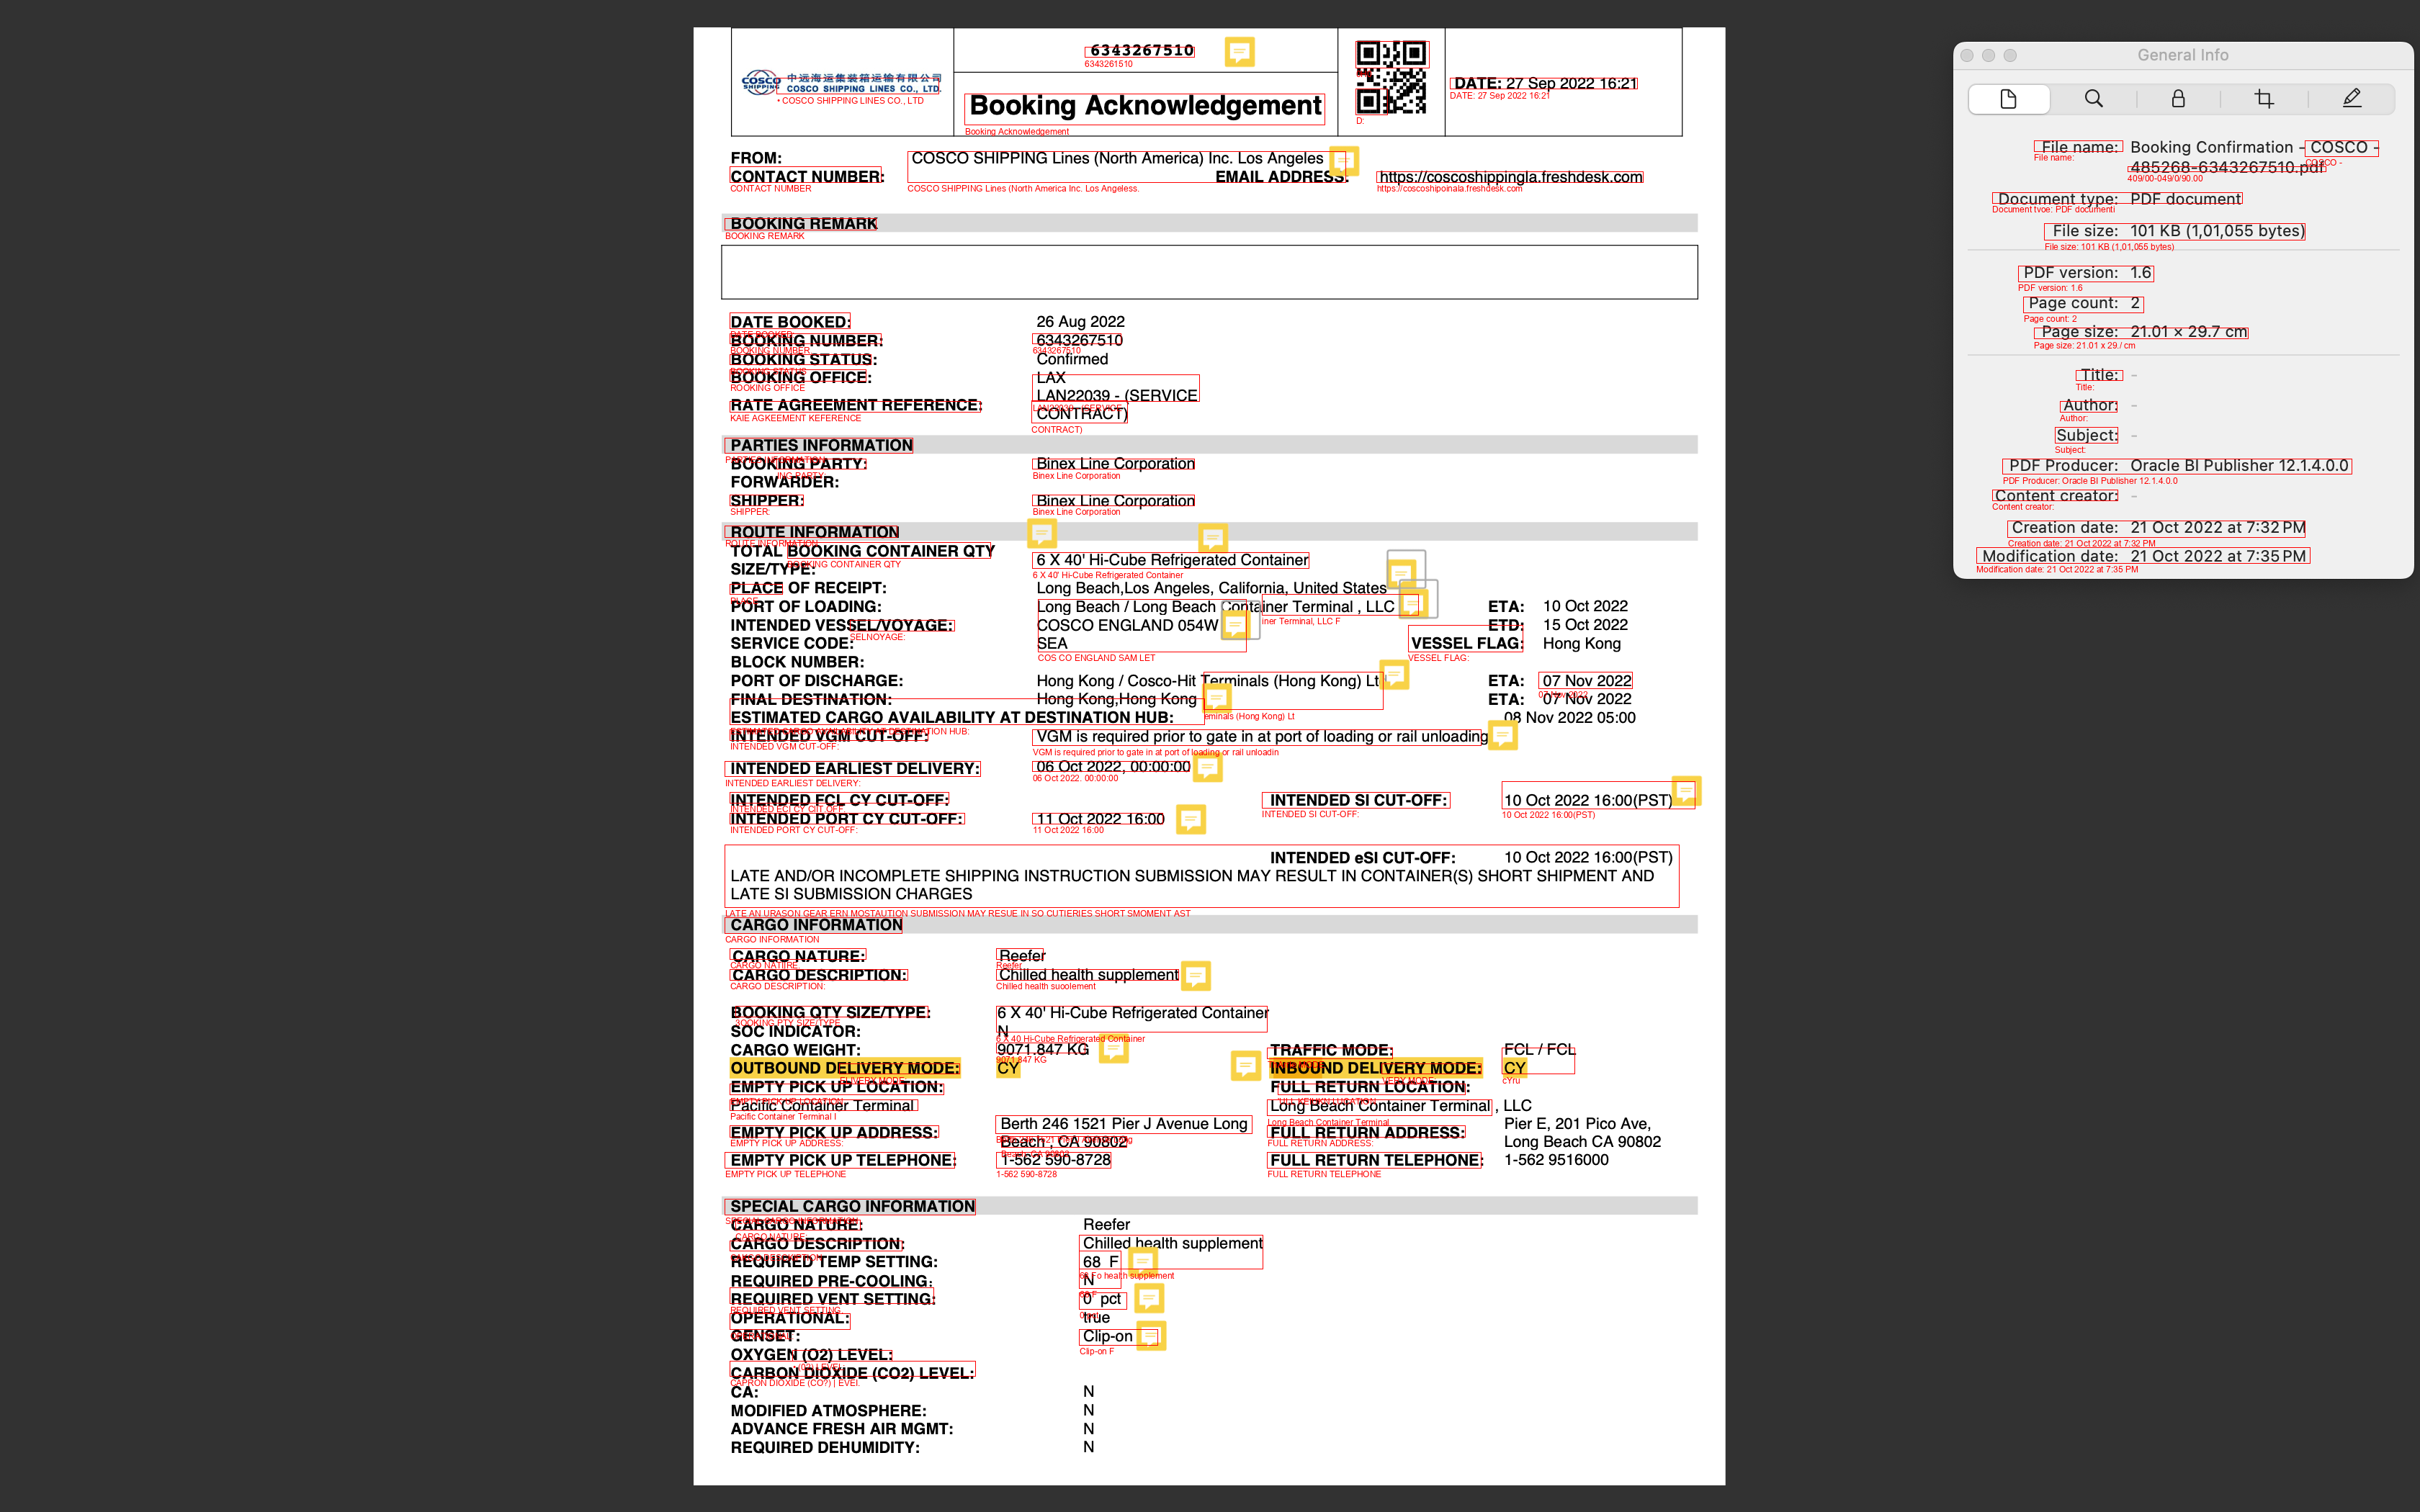

In [13]:
from ocrmac import ocrmac
ocrmac.OCR('Screenshot 2024-07-02 at 5.39.57 PM.png',language_preference=['en-US']).annotate_PIL()

In [14]:
from ocrmac import ocrmac
ocrmac.OCR('Screenshot 2024-07-02 at 5.39.57 PM.png',language_preference=['en-US'],recognition_level='accurate').recognize()

[('6343261510',
  1.0,
  [0.44827586145030085,
   0.9620689659494485,
   0.045258617401123025,
   0.006896550859723738]),
 ('• COSCO SHIPPING LINES CO., LTD',
  1.0,
  [0.3211206910125586,
   0.9377142857673713,
   0.06681033543178005,
   0.010561575753348262]),
 ('Booking Acknowledgement',
  1.0,
  [0.3987068953886889,
   0.9171428572158308,
   0.14870689392089836,
   0.020788176400320824]),
 ('CONTACT NUMBER',
  1.0,
  [0.3017241437808179,
   0.8793103453758322,
   0.06249999455043248,
   0.010403940473284079]),
 ('COSCO SHIPPING Lines (North America Inc. Los Angeless.',
  1.0,
  [0.3750000156287875,
   0.8793103448895956,
   0.1810344696044922,
   0.02068965475899831]),
 ('BOOKING REMARK',
  1.0,
  [0.29956896540948275, 0.8479999999555158, 0.0625, 0.007428571428571451]),
 ('0H0',
  0.30000001192092896,
  [0.5603448273969678,
   0.9551724139268757,
   0.03017241341727117,
   0.01724137878417964]),
 ('DATE: 27 Sep 2022 16:21',
  1.0,
  [0.5991379310206821,
   0.9411428570490818,
   0.

In [15]:
import objc
from Cocoa import NSURL
from Quartz import CIImage
from Vision import VNImageRequestHandler, VNRecognizeTextRequest, VNRecognizedTextObservation

def recognize_text_in_image(image_path):
    # Convert image file path to NSURL
    image_url = NSURL.fileURLWithPath_(image_path)
    
    # Create a CIImage from the image file
    ci_image = CIImage.imageWithContentsOfURL_(image_url)
    
    if ci_image is None:
        print(f"Failed to load image from {image_path}")
        return

    # Create a text recognition request
    def handle_text_recognition_request(request, error):
        if error is not None:
            print(f"Error: {error.localizedDescription()}")
            return
        
        for observation in request.results():
            if isinstance(observation, VNRecognizedTextObservation):
                top_candidate = observation.topCandidates_(1)[0]
                print(f"Recognized Text: {top_candidate.string()}")

    request = VNRecognizeTextRequest.alloc().initWithCompletionHandler_(handle_text_recognition_request)
    
    # Create an image request handler
    handler = VNImageRequestHandler.alloc().initWithCIImage_options_(ci_image, None)
    
    # Perform the request
    success, error = handler.performRequests_error_([request], None)
    
    if not success:
        print(f"Failed to perform text recognition request: {error.localizedDescription()}")

# Path to the image file
image_path = 'Screenshot 2024-07-02 at 5.39.57 PM.png'

# Recognize text in the image
recognize_text_in_image(image_path)


Recognized Text: 6343261510
Recognized Text: • COSCO SHIPPING LINES CO., LTD
Recognized Text: Booking Acknowledgement
Recognized Text: CONTACT NUMBER
Recognized Text: COSCO SHIPPING Lines (North America Inc. Los Angeless.
Recognized Text: BOOKING REMARK
Recognized Text: 0H0
Recognized Text: DATE: 27 Sep 2022 16:21
Recognized Text: D:
Recognized Text: https://coscoshipoinala.freshdesk.com
Recognized Text: DATE BOOKED:
Recognized Text: BOOKING NUMBER.
Recognized Text: BOOKING STATUS
Recognized Text: ROOKING OFFICE
Recognized Text: 6343267510
Recognized Text: KAIE AGKEEMENT KEFERENCE
Recognized Text: LAN22039 - (SERVICE
Recognized Text: CONTRACT)
Recognized Text: PARTIES INFORMATION
Recognized Text: ING PARTY:
Recognized Text: Binex Line Corporation
Recognized Text: SHIPPER:
Recognized Text: Binex Line Corporation
Recognized Text: ROUTE INFORMATION
Recognized Text: BOOKING CONTAINER QTY
Recognized Text: 6 X 40' Hi-Cube Refrigerated Container
Recognized Text: PLACE
Recognized Text: SELNOYA